In [1]:
# Load the required dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy import stats
from scipy.stats import linregress
from scipy.stats import f_oneway

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', 150, 'display.max_rows', 255)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Read in the File and preview it.
df = pd.read_excel("Data_ready.xlsm")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check and count number of missing values for each variable
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
# Check for correlation between the variables
# house = sns.heatmap(df.corr(), annot=True)

In [5]:
# Set list of columns to keep for analysis

cols = ['MSSubClass', 'MSZoning', 'LotArea',
       'Utilities', 
       'Neighborhood', 'OverallCond', 'YearBuilt', 
       'RoofMatl', 'Exterior1st',
       'ExterCond', 'Foundation', 
       'TotalBsmtSF', 
       'CentralAir', 
       'GrLivArea',  'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd', 'GarageArea', 'PavedDrive',  
       'YrSold', 'SaleType',
       'SalePrice']
housing_df = df[cols].copy()
housing_df.head()

,MSSubClass,MSZoning,LotArea,Utilities,Neighborhood,OverallCond,YearBuilt,RoofMatl,Exterior1st,ExterCond,Foundation,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PavedDrive,YrSold,SaleType,SalePrice
0,60,RL,8450,AllPub,CollgCr,5,2003,CompShg,VinylSd,TA,PConc,856,Y,1710,2,1,3,1,8,548,Y,2008,WD,208500
1,20,RL,9600,AllPub,Veenker,8,1976,CompShg,MetalSd,TA,CBlock,1262,Y,1262,2,0,3,1,6,460,Y,2007,WD,181500
2,60,RL,11250,AllPub,CollgCr,5,2001,CompShg,VinylSd,TA,PConc,920,Y,1786,2,1,3,1,6,608,Y,2008,WD,223500
3,70,RL,9550,AllPub,Crawfor,5,1915,CompShg,Wd Sdng,TA,BrkTil,756,Y,1717,1,0,3,1,7,642,Y,2006,WD,140000
4,60,RL,14260,AllPub,NoRidge,5,2000,CompShg,VinylSd,TA,PConc,1145,Y,2198,2,1,4,1,9,836,Y,2008,WD,250000


In [6]:
# Calculate the age of the house
housing_df['Age'] = housing_df['YrSold'] - housing_df['YearBuilt']

In [7]:
# Home prices by the year Sold
housing_df.groupby(['Age']).agg({'SalePrice':['mean','median','std','min', 'max', 'count']})

SalePrice                                            
          mean     median        std     min     max count
Age                                                       
0   264,302.23 243,289.00  83,322.06   84500  465000    64
1   266,914.00 235,064.00 108,857.14  140000  611657   100
2   223,247.85 203,000.00  67,825.64  130000  378500    39
3   253,159.72 245,500.00  69,556.34  148000  377500    36
4   199,063.41 192,500.00  42,747.69  131500  312500    41
5   235,136.67 222,450.00  62,884.17  136500  412500    30
6   223,234.53 217,500.00  68,687.78  140000  466500    30
7   223,333.33 207,500.00  76,548.18  140000  538000    24
8   211,244.00 214,900.00  35,684.46  153500  280000    25
9   228,317.39 217,000.00  53,095.09  133000  348000    23
10  203,306.82 190,000.00  45,632.06  148000  337000    22
11  271,389.00 207,600.00 147,875.59  155000  745000    22
12  224,025.00 222,950.00  43,568.38  168000  290000    16
13  240,080.00 201,000.00 156,135.07  123600  755000    15
14  241,342.86 229,750.00  70,170.11  145000  403000    14
15  245,925.00 232,250.00  91,694.06  138000  430000    20
16  202,541.67 195,000.00  60,742.17   93500  325000    12
17  209,872.73 187,500.00  61,932.40  118500  335000    11
18  207,285.00 209,250.00  39,098.28  147000  262280     8
19  218,342.86 211,000.00  44,852.79  173000  277000     7
20  229,800.00 190,000.00  64,091.34  175000  320000     5
21  220,500.00 201,000.00  56,059.79  170000  301000     6
22  183,357.14 184,000.00  24,508.02  142500  215000     7
23  172,166.67 178,000.00  38,582.16  131000  207500     3
24  134,400.00 134,000.00  20,035.59  112000  162500     5
25  206,357.14 187,500.00  87,731.46  124500  385000     7
26  178,928.57 152,000.00  67,625.73  125000  316600     7
27  144,672.00 137,000.00  17,338.13  134900  175500     5
28  205,100.00 197,000.00  57,909.84  149500  278000     5
29  170,000.00 158,000.00  43,251.95  120000  260000    14
30  155,890.11 150,000.00  23,125.74  118858  190000    19
31  168,832.42 157,000.00  42,645.81   99500  280000    31
32  168,526.09 159,500.00  51,521.37   82500  299800    23
33  157,976.67 150,000.00  49,611.70   83000  294000    15
34  148,943.33 130,500.00  48,021.60   85000  244000    15
35  136,909.09 136,000.00  35,703.51   88000  190000    11
36  136,722.50 123,950.00  48,216.56   81000  302000    20
37  145,324.00 133,500.00  60,226.72   75000  345000    25
38  164,087.50 164,000.00  54,361.71   75500  262500    16
39  129,198.29 124,750.00  34,025.51   80000  206900    24
40  166,261.33 156,000.00  41,984.30  107000  274970    15
41  145,920.59 143,000.00  24,537.81  110000  193500    17
42  148,945.45 145,675.00  35,998.31   94750  244000    22
43  158,776.32 148,000.00  35,035.23  119000  242000    19
44  165,264.56 157,000.00  65,571.08   62383  375000    16
45  137,105.88 136,500.00  22,376.42   98600  169500    17
46  151,850.00 145,250.00  19,652.29  118500  180500    15
47  143,402.17 141,000.00  19,046.49  109500  181900    23
48  154,608.33 150,375.00  34,921.07  106500  242000    18
49  148,032.48 144,000.00  38,592.29   80000  277000    21
50  166,432.75 158,650.00  40,498.74  120000  257500    16
51  149,118.04 139,000.00  56,283.98   60000  335000    24
52  127,676.67 135,750.00  23,180.12   84000  161500    15
53  134,325.00 131,950.00  28,461.24   82000  225000    20
54  156,294.12 134,500.00  49,731.37  105500  256000    17
55  125,266.67 116,000.00  24,492.40   93000  155000     9
56  125,030.00 125,500.00  24,282.51   93000  167000    10
57  123,275.92 124,250.00  49,102.81   35311  243000    12
58  135,430.23 135,000.00  42,087.47   55993  225000    13
59  124,118.75 135,900.00  28,695.72   72500  159000    16
60  125,247.73 128,000.00  16,171.43   90000  147000    11
61  127,060.00 132,000.00  58,126.53   39300  200500     5
62  140,857.14 118,000.00  56,014.67   97500  259500     7
63  137,500.00 137,500.00   3,535.53  135000  140000     2
64   91,450.00  91,450.00   9,263.10   84900   98000

The correlation is: PearsonRResult(statistic=-0.523350417546816, pvalue=1.8565394161718132e-103)


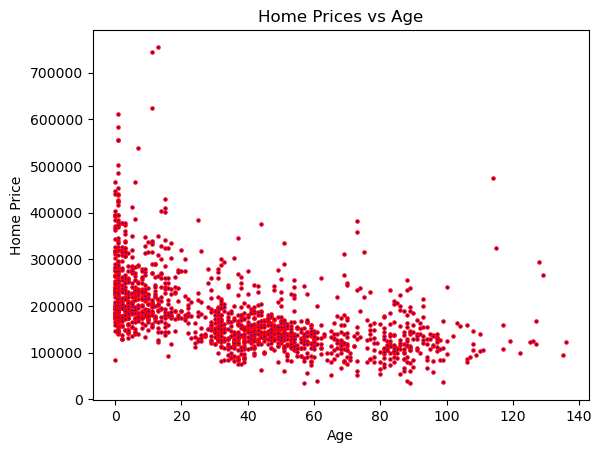

In [8]:
# Scatterplot of Home Price by Age of Home

y_values = housing_df['SalePrice']
x_values = housing_df['Age']
plt.scatter(x_values,y_values, c ="blue", linewidths = 1, marker ="o", edgecolor ="red", s = 5)
plt.title('Home Prices vs Age')
plt.ylabel('Home Price')
plt.xlabel('Age')

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation is: {correlation}")
plt.show()

In [9]:
# Home prices by the year Sold
housing_df.groupby(['YrSold']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                                    
             mean     median       std    min     max
YrSold                                               
2006   182,549.46 163,995.00 79,426.84  35311  625000
2007   186,063.15 167,000.00 85,768.17  39300  755000
2008   177,360.84 164,000.00 69,735.61  40000  446261
2009   179,432.10 162,000.00 80,879.24  34900  582933
2010   177,393.67 155,000.00 80,451.28  55000  611657

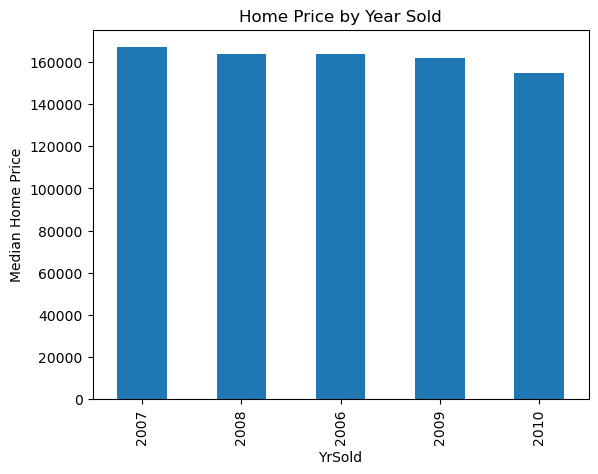

In [10]:
# Median Home Price by year it was sold
yr = housing_df.groupby(['YrSold'])
group0 = yr['SalePrice'].median().sort_values(ascending=False)
price_chart0 = group0.plot(kind='bar', title ='Home Price by Year Sold')
plt.ylabel('Median Home Price')
plt.show()

In [11]:
# Home prices by Overall Condition
housing_df.groupby(['OverallCond']).agg({'SalePrice':['mean','median','var','std','min', 'max']})

SalePrice                                                        
                  mean     median               var        std     min     max
OverallCond                                                                   
1            61,000.00  61,000.00               NaN        NaN   61000   61000
2           141,986.40  85,000.00 19,977,790,924.80 141,342.81   67000  394432
3           101,929.40  89,500.00  2,011,745,895.33  44,852.49   35311  200624
4           120,438.44 115,000.00  1,514,963,022.96  38,922.53   40000  235000
5           203,146.91 185,000.00  7,244,958,064.57  85,117.32   34900  745000
6           153,961.59 142,750.00  3,689,100,978.35  60,737.97   37900  755000
7           158,145.49 145,000.00  2,858,847,281.01  53,468.19   79900  402000
8           155,651.74 142,500.00  2,743,155,780.39  52,375.14   84500  335000
9           216,004.55 176,200.00  9,309,543,311.69  96,485.97  110500  475000

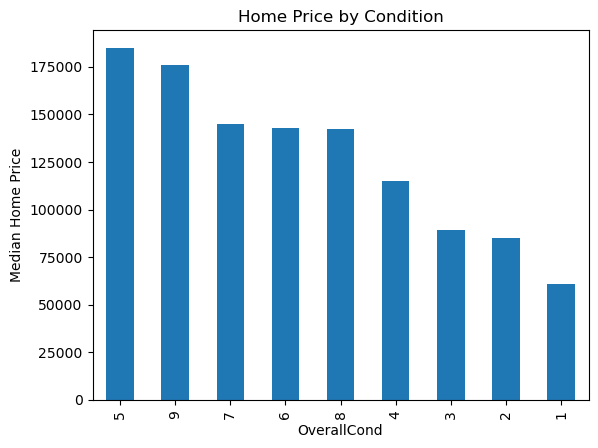

In [12]:
# Median Home Price by the overall condtion rating of the home
hse = housing_df.groupby(['OverallCond'])
group1 = hse['SalePrice'].median().sort_values(ascending=False)
price_chart1 = group1.plot(kind='bar', title ='Home Price by Condition')
plt.ylabel('Median Home Price')
plt.show()

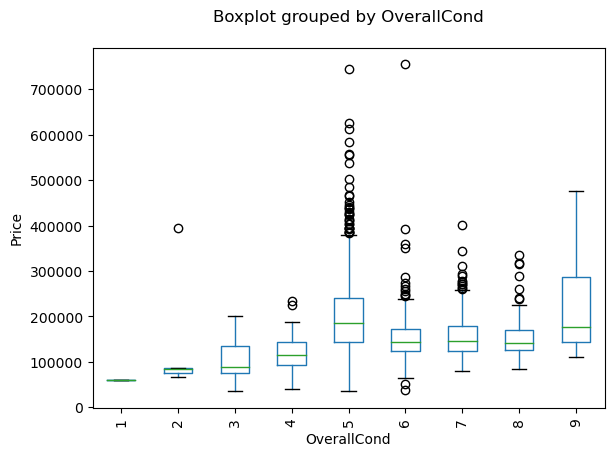

In [13]:
# Boxplot of the Price by Condtion ratiing
housing_df.boxplot(column = "SalePrice", by = "OverallCond", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Price")
plt.show()

In [14]:
# Home prices by Neighborhood
housing_df.groupby(['Neighborhood']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                                      
                   mean     median        std     min     max
Neighborhood                                                 
Blmngtn      194,870.88 191,000.00  30,393.23  159895  264561
Blueste      137,500.00 137,500.00  19,091.88  124000  151000
BrDale       104,493.75 106,000.00  14,330.18   83000  125000
BrkSide      124,834.05 124,300.00  40,348.69   39300  223500
ClearCr      212,565.43 200,250.00  50,231.54  130000  328000
CollgCr      197,965.77 197,200.00  51,403.67  110000  424870
Crawfor      210,624.73 200,624.00  68,866.40   90350  392500
Edwards      128,219.70 121,750.00  43,208.62   58500  320000
Gilbert      192,854.51 181,000.00  35,986.78  141000  377500
IDOTRR       100,123.78 103,000.00  33,376.71   34900  169500
MeadowV       98,576.47  88,000.00  23,491.05   75000  151400
Mitchel      156,270.12 153,500.00  36,486.63   84500  271000
NAmes        145,847.08 140,000.00  33,075.35   87500  345000
NPkVill      142,694.44 146,000.00   9,377.31  127500  155000
NWAmes       189,050.07 182,900.00  37,172.22   82500  299800
NoRidge      335,295.32 301,500.00 121,412.66  190000  755000
NridgHt      316,270.62 315,000.00  96,392.54  154000  611657
OldTown      128,225.30 119,000.00  52,650.58   37900  475000
SWISU        142,591.36 139,500.00  32,622.92   60000  200000
Sawyer       136,793.14 135,000.00  22,345.13   62383  190000
SawyerW      186,555.80 179,900.00  55,652.00   76000  320000
Somerst      225,379.84 225,500.00  56,177.56  144152  423000
StoneBr      310,499.00 278,000.00 112,969.68  170000  556581
Timber       242,247.45 228,475.00  64,845.65  137500  378500
Veenker      238,772.73 218,000.00  72,369.32  162500  385000

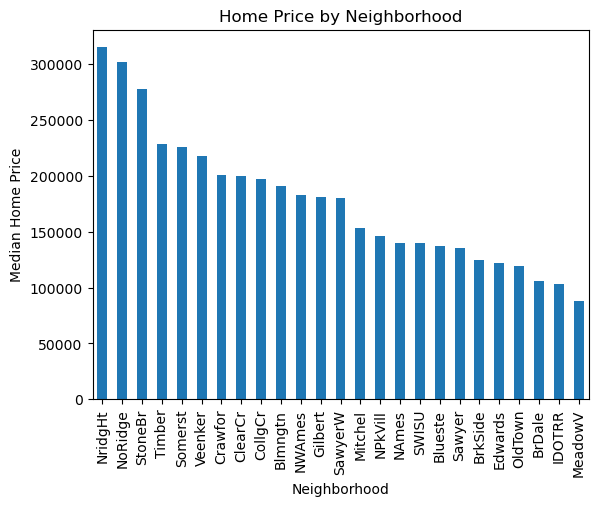

In [15]:
# Median Home Price by Neighborhood 
grp = housing_df.groupby(['Neighborhood'])
group = grp['SalePrice'].median().sort_values(ascending=False)
price_chart = group.plot(kind='bar', title ='Home Price by Neighborhood')
plt.ylabel('Median Home Price')
plt.show()

In [16]:
# Count missing/null values for each variable
housing_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
Utilities       0
Neighborhood    0
OverallCond     0
YearBuilt       0
RoofMatl        0
Exterior1st     0
ExterCond       0
Foundation      0
TotalBsmtSF     0
CentralAir      0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
PavedDrive      0
YrSold          0
SaleType        0
SalePrice       0
Age             0
dtype: int64

In [17]:
# Check datatype of variables
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   Utilities     1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   OverallCond   1460 non-null   int64 
 6   YearBuilt     1460 non-null   int64 
 7   RoofMatl      1460 non-null   object
 8   Exterior1st   1460 non-null   object
 9   ExterCond     1460 non-null   object
 10  Foundation    1460 non-null   object
 11  TotalBsmtSF   1460 non-null   int64 
 12  CentralAir    1460 non-null   object
 13  GrLivArea     1460 non-null   int64 
 14  FullBath      1460 non-null   int64 
 15  HalfBath      1460 non-null   int64 
 16  BedroomAbvGr  1460 non-null   int64 
 17  KitchenAbvGr  1460 non-null   int64 
 18  TotRmsAbvGrd  1460 non-null   int64 
 19  Garage

In [18]:
# Get quick summary of the variables.
housing_df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,YrSold,SalePrice,Age
count,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,56.90,"10,516.83",5.58,"1,971.27","1,057.43","1,515.46",1.57,0.38,2.87,1.05,6.52,472.98,"2,007.82","180,921.20",36.55
std,42.30,"9,981.26",1.11,30.20,438.71,525.48,0.55,0.50,0.82,0.22,1.63,213.80,1.33,"79,442.50",30.25
min,20.00,"1,300.00",1.00,"1,872.00",0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,"2,006.00","34,900.00",0.00
25%,20.00,"7,553.50",5.00,"1,954.00",795.75,"1,129.50",1.00,0.00,2.00,1.00,5.00,334.50,"2,007.00","129,975.00",8.00
50%,50.00,"9,478.50",5.00,"1,973.00",991.50,"1,464.00",2.00,0.00,3.00,1.00,6.00,480.00,"2,008.00","163,000.00",35.00
75%,70.00,"11,601.50",6.00,"2,000.00","1,298.25","1,776.75",2.00,1.00,3.00,1.00,7.00,576.00,"2,009.00","214,000.00",54.00
max,190.00,"215,245.00",9.00,"2,010.00","6,110.00","5,642.00",3.00,2.00,8.00,3.00,14.00,"1,418.00","2,010.00","755,000.00",136.00


In [19]:
# Save cleaned dataframe to a cvs
# housing_df.to_csv('housing.csv',index=False)

C:\Users\rober\AppData\Local\Temp\ipykernel_28976\1535364262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = housing_df.corr().round(2)


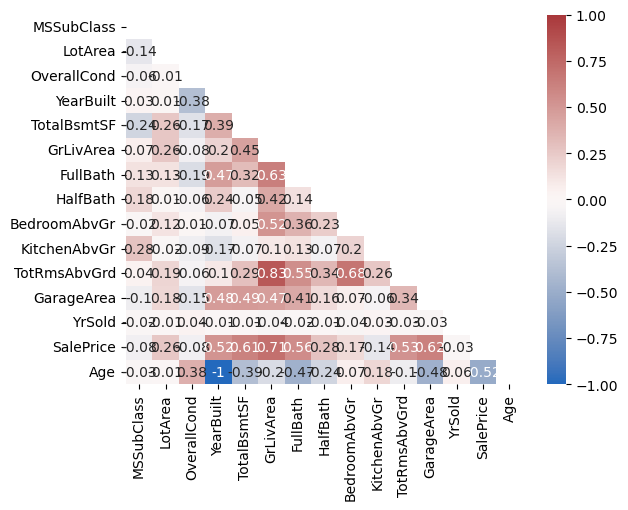

In [20]:
# Find correlation between the varaibles and plot a heatmap of the relationships
mat = housing_df.corr().round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [21]:
# Check the kind of relationship between variables
# scatter_matrix(housing_df, alpha = 0.2, figsize = (20, 20), diagonal = 'hist')

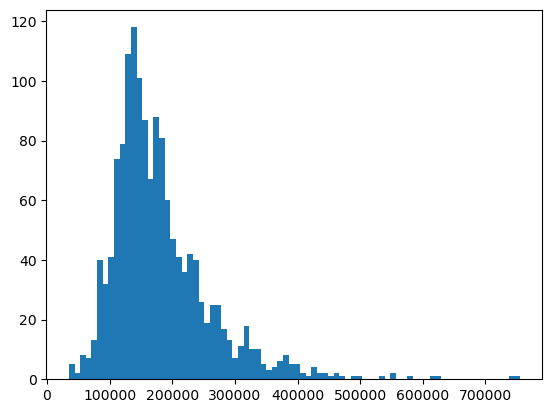

In [22]:
# Run some exploratory plots to find relationships.
plt.hist(housing_df['SalePrice'], bins=80)
plt.show()

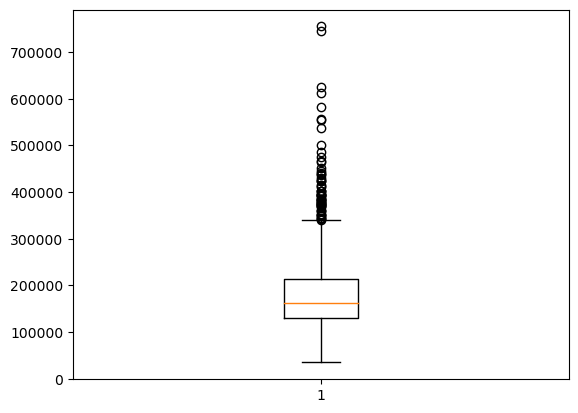

In [23]:
plt.boxplot(housing_df['SalePrice'])
plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_28976\1649768311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(housing_df.corr())


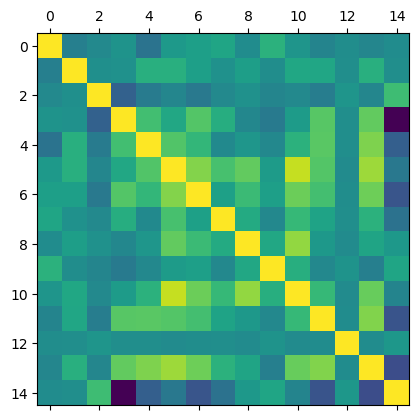

In [24]:
plt.matshow(housing_df.corr())
plt.show()

In [25]:
# Create a copy of the dataframe to use in neural networks
nn_df = housing_df.copy()
nn_df = nn_df.drop(columns=['YrSold','YearBuilt','Neighborhood'])
nn_df.head()

,MSSubClass,MSZoning,LotArea,Utilities,OverallCond,RoofMatl,Exterior1st,ExterCond,Foundation,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PavedDrive,SaleType,SalePrice,Age
0,60,RL,8450,AllPub,5,CompShg,VinylSd,TA,PConc,856,Y,1710,2,1,3,1,8,548,Y,WD,208500,5
1,20,RL,9600,AllPub,8,CompShg,MetalSd,TA,CBlock,1262,Y,1262,2,0,3,1,6,460,Y,WD,181500,31
2,60,RL,11250,AllPub,5,CompShg,VinylSd,TA,PConc,920,Y,1786,2,1,3,1,6,608,Y,WD,223500,7
3,70,RL,9550,AllPub,5,CompShg,Wd Sdng,TA,BrkTil,756,Y,1717,1,0,3,1,7,642,Y,WD,140000,91
4,60,RL,14260,AllPub,5,CompShg,VinylSd,TA,PConc,1145,Y,2198,2,1,4,1,9,836,Y,WD,250000,8


In [26]:
# nn_df = nn_df.drop(columns='Id', axis=1)
nn_df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Utilities', 'OverallCond',
       'RoofMatl', 'Exterior1st', 'ExterCond', 'Foundation', 'TotalBsmtSF',
       'CentralAir', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'PavedDrive', 'SaleType',
       'SalePrice', 'Age'],
      dtype='object')

In [27]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy =  nn_df.dtypes[nn_df.dtypes == "object"].index.tolist()
df_dummies = pd.get_dummies(nn_df, columns=dummy)

df_dummies.head()

,MSSubClass,LotArea,OverallCond,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Age,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,8450,5,856,1710,2,1,3,1,8,548,208500,5,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,20,9600,8,1262,1262,2,0,3,1,6,460,181500,31,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,60,11250,5,920,1786,2,1,3,1,6,608,223500,7,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,70,9550,5,756,1717,1,0,3,1,7,642,140000,91,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,60,14260,5,1145,2198,2,1,4,1,9,836,250000,8,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [28]:
# Calculate Z-values
df_dummies['price_scaled'] = np.abs(stats.zscore(df_dummies['SalePrice']))

# Filter out outliers
df_dummies = df_dummies[df_dummies['price_scaled'] <= 2.5]

# Drop the column
df_dummies = df_dummies.drop('price_scaled', axis=1)

In [29]:
df_dummies.describe()

,MSSubClass,LotArea,OverallCond,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Age,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,"1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00"
mean,57.28,"10,325.43",5.59,"1,033.47","1,484.81",1.55,0.37,2.86,1.05,6.44,463.19,"173,066.06",37.33,0.01,0.05,0.01,0.78,0.15,1.00,0.00,0.00,0.98,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.03,0.00,0.04,0.15,0.00,0.15,0.08,0.00,0.02,0.35,0.14,0.02,0.00,0.02,0.10,0.00,0.88,0.10,0.44,0.43,0.02,0.00,0.00,0.07,0.93,0.06,0.02,0.92,0.03,0.00,0.00,0.01,0.00,0.00,0.07,0.00,0.88
std,42.65,"9,899.16",1.11,413.12,486.66,0.54,0.50,0.81,0.22,1.56,206.86,"63,183.89",30.10,0.08,0.21,0.11,0.41,0.36,0.03,0.03,0.03,0.13,0.03,0.03,0.03,0.09,0.06,0.05,0.12,0.03,0.04,0.18,0.03,0.19,0.36,0.03,0.36,0.27,0.04,0.13,0.48,0.35,0.13,0.05,0.14,0.30,0.03,0.33,0.30,0.50,0.50,0.13,0.06,0.05,0.25,0.25,0.24,0.14,0.28,0.17,0.05,0.04,0.08,0.05,0.06,0.25,0.05,0.32
min,20.00,"1,300.00",1.00,0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,"34,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,"7,500.00",5.00,792.75,"1,122.75",1.00,0.00,2.00,1.00,5.00,318.75,"129,000.00",8.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,50.00,"9,362.00",5.00,978.50,"1,443.50",2.00,0.00,3.00,1.00,6.00,473.00,"160,000.00",36.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,70.00,"11,376.25",6.00,"1,261.25","1,740.50",2.00,1.00,3.00,1.00,7.00,576.00,"207,125.00",55.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,190.00,"215

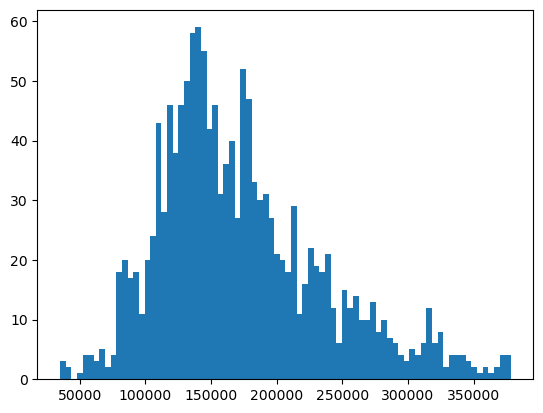

In [30]:
plt.hist(df_dummies['SalePrice'], bins=80)
plt.show()

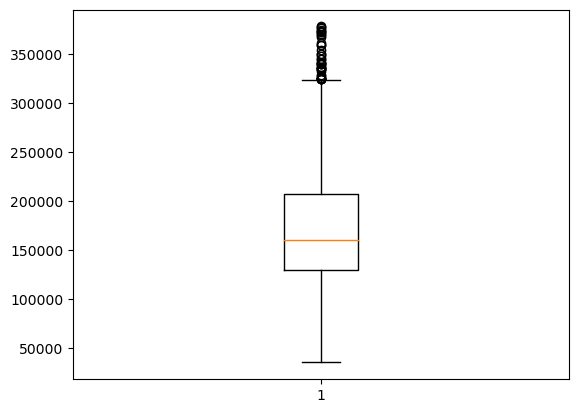

In [31]:
plt.boxplot(df_dummies['SalePrice'])
plt.show()

In [32]:
# Split our preprocessed data into our features and target arrays
y = df_dummies['SalePrice'].values
X = df_dummies.drop(['SalePrice'],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [33]:
y_train.mean()

173715.56995305166

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
X_test_scaled[:5]

array([[ 4.75825699e-02,  4.94878376e-02, -5.55733204e-01,
        -5.30117745e-03,  1.21774210e+00,  8.54293874e-01,
         1.23338003e+00,  1.94504843e-01, -2.07798336e-01,
         1.01677960e+00,  1.83845705e+00, -1.20057125e+00,
        -8.13403780e-02,  4.76095229e+00, -1.11163908e-01,
        -1.88448456e+00, -4.34299518e-01,  3.06569670e-02,
        -3.06569670e-02, -3.06569670e-02,  1.27363158e-01,
        -3.06569670e-02, -3.06569670e-02, -3.06569670e-02,
        -8.69976457e-02, -6.14005560e-02, -3.06569670e-02,
        -1.15415107e-01, -3.06569670e-02, -3.06569670e-02,
        -1.84338229e-01, -3.06569670e-02, -2.02622108e-01,
        -4.26637994e-01, -3.06569670e-02, -4.31241023e-01,
        -2.71272390e-01, -3.06569670e-02, -1.31118180e-01,
         1.35646600e+00, -4.12710153e-01, -1.27363158e-01,
        -5.31494003e-02, -1.38342893e-01, -3.44525005e-01,
         0.00000000e+00,  3.82614652e-01, -3.41104385e-01,
        -8.80340843e-01,  1.14027014e+00, -1.27363158e-0

In [36]:
from tensorflow.keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [37]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))


In [38]:
from keras.layers import LeakyReLU

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  120
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 60

nn = tf.keras.models.Sequential(normalizer)

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation= "LeakyReLU"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 67)                135       
 on)                                                             
                                                                 
 dense (Dense)               (None, 120)               8160      
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 30136 (117.72 KB)
Trainable params: 30001 (117.19 KB)
Non-trainable params: 135 (544.00 Byte)
______________

In [40]:
# Compile the model
nn.compile(loss='mse', optimizer="adam", metrics=['accuracy', rmse])

In [41]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=120)

Epoch 1/120
34/34 [==============================] - 3s 6ms/step - loss: 34224322560.0000 - accuracy: 0.0000e+00 - rmse: 185227.3281
Epoch 2/120
34/34 [==============================] - 0s 4ms/step - loss: 34176882688.0000 - accuracy: 0.0000e+00 - rmse: 184286.3750
Epoch 3/120
34/34 [==============================] - 0s 5ms/step - loss: 33876156416.0000 - accuracy: 0.0000e+00 - rmse: 184084.8281
Epoch 4/120
34/34 [==============================] - 0s 5ms/step - loss: 32732880896.0000 - accuracy: 0.0000e+00 - rmse: 180247.8750
Epoch 5/120
34/34 [==============================] - 0s 5ms/step - loss: 29668741120.0000 - accuracy: 0.0000e+00 - rmse: 171358.1094
Epoch 6/120
34/34 [==============================] - 0s 5ms/step - loss: 23663212544.0000 - accuracy: 0.0000e+00 - rmse: 153439.9062
Epoch 7/120
34/34 [==============================] - 0s 5ms/step - loss: 15355586560.0000 - accuracy: 0.0000e+00 - rmse: 122713.4062
Epoch 8/120
34/34 [==============================] - 0s 5ms/step - lo

In [42]:
y_pred = nn.predict(X_test)
# print(MeanSquaredError(y_test, y_pred).numpy())

# print(f'y_actual: {y_test}, y_pred:{y_pred}')
y_pred[:20]

12/12 [==============================] - 0s 4ms/step


array([[2.71612312e+05],
       [2.20755562e+05],
       [1.55880000e+05],
       [1.27327430e+05],
       [1.31278516e+05],
       [1.51448938e+05],
       [3.60475844e+05],
       [1.61545016e+05],
       [1.48713203e+05],
       [2.79202469e+05],
       [1.26818016e+05],
       [2.21332219e+05],
       [1.59194719e+05],
       [1.13070062e+05],
       [2.31881766e+05],
       [4.33537720e+10],
       [1.67704719e+05],
       [1.55856828e+05],
       [9.15637188e+04],
       [2.44705234e+05]], dtype=float32)

In [43]:
y_pred[:5]-y_test[:5]

array([[-6.81376875e+04,  1.16123125e+04,  1.03112312e+05,
         1.40212312e+05,  1.11612312e+05],
       [-1.18994438e+05, -3.92444375e+04,  5.22555625e+04,
         8.93555625e+04,  6.07555625e+04],
       [-1.83870000e+05, -1.04120000e+05, -1.26200000e+04,
         2.44800000e+04, -4.12000000e+03],
       [-2.12422570e+05, -1.32672570e+05, -4.11725703e+04,
        -4.07257031e+03, -3.26725703e+04],
       [-2.08471484e+05, -1.28721484e+05, -3.72214844e+04,
        -1.21484375e+02, -2.87214844e+04]])

CPU times: total: 3.12 s
Wall time: 20.4 s


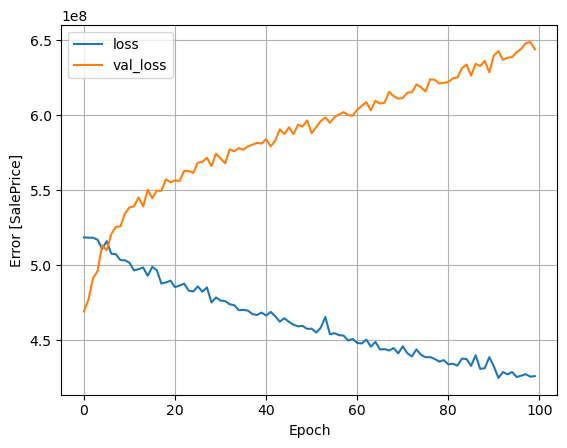

In [44]:
%%time
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
# plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [SalePrice]')
plt.legend()
plt.grid(True)